# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [8]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import warnings
warnings.filterwarnings('ignore')
from panel import widgets


In [9]:
# Read the Mapbox API key
load_dotenv('key.env')
map_box_api = os.getenv("mapbox")


## Load Data

In [10]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [27]:
# Calculate the mean number of housing units per year (hint: use groupby) 
miny = housing_units_year_miny = sfo_data.groupby([sfo_data.index, 'housing_units']).min()
maxy = housing_units_year_maxy = sfo_data.groupby([sfo_data.index, 'housing_units']).max()
housing_units_year = sfo_data.groupby([sfo_data.index, 'housing_units', 'neighborhood']).mean()
housing_units_year

sale_price_sqr_foot  gross_rent
year housing_units neighborhood                                           
2010 372560        Alamo Square                     291.182945      1239.0
                   Anza Vista                       267.932583      1239.0
                   Bayview                          170.098665      1239.0
                   Buena Vista Park                 347.394919      1239.0
                   Central Richmond                 319.027623      1239.0
...                                                        ...         ...
2016 384242        Telegraph Hill                   903.049771      4390.0
                   Twin Peaks                       970.085470      4390.0
                   Van Ness/ Civic Center           552.602567      4390.0
                   Visitacion Valley                328.319007      4390.0
                   Westwood Park                    631.195426      4390.0

[397 rows x 2 columns]

In [29]:
# Save the dataframe as a csv file
housing_units_year.to_csv('housing_units_year.csv')
housing_units_year = pd.read_csv('housing_units_year.csv')


,Unnamed: 0,year,housing_units,neighborhood,sale_price_sqr_foot,gross_rent
0,0,2010,372560,Alamo Square,291.182945,1239.0
1,1,2010,372560,Anza Vista,267.932583,1239.0
2,2,2010,372560,Bayview,170.098665,1239.0
3,3,2010,372560,Buena Vista Park,347.394919,1239.0
4,4,2010,372560,Central Richmond,319.027623,1239.0
...,...,...,...,...,...,...
392,392,2016,384242,Telegraph Hill,903.049771,4390.0
393,393,2016,384242,Twin Peaks,970.085470,4390.0
394,394,2016,384242,Van Ness/ Civic Center,552.602567,4390.0
395,395,2016,384242,Visitacion Valley,328.319007,4390.0


In [194]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
#housing_units_year_plot = housing_units_year.plot(kind='hist', x='housing_units', ylim=('miny', 'maxy'))

average_housing_units_per_year = housing_unit_year.plot(
    kind='bar',
    ylim=('miny', 'minx'),
    y='housing_units',
    x='year'
)

NameError: name 'housing_unit_year' is not defined

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [195]:
# Calculate the average sale price per square foot and average gross rent
average_price_per_square_foot = sfo_data.groupby(['sale_price_sqr_foot', 'year','neighborhood']).mean()
average_monthly_rent = sfo_data.groupby(['gross_rent', 'year','neighborhood']).mean()


In [196]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
average_price_per_square_plot = average_price_per_square_foot.hvplot.line(
            label='average price per sqr foot in San Francisco',
            rot=90,
            x='sale_price_sqr_foot',
            y='year',
            groupby='neighborhood',
            
            
)


average_monthly_rent_plot = average_monthly_rent.hvplot.line(
            label='Average monthly rent in San Francisco',
            rot=90,
            x='gross_rent',
            y='year',
            groupby='neighborhood'
)


average_price_per_square_plot + average_monthly_rent_plot



:Layout
   .DynamicMap.I  :DynamicMap   [neighborhood]
      :Curve   [sale_price_sqr_foot]   (year)
   .DynamicMap.II :DynamicMap   [neighborhood]
      :Curve   [gross_rent]   (year)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [197]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_year = sfo_data.groupby(['year', 'neighborhood']).mean()

In [198]:
# Use hvplot to create an interactive line chart of the average price per sq ft.

#The plot should have a dropdown selector for the neighborhood
neighborhood_year.hvplot.line(
        title='trend average price per square foot',
        y='sale_price_sqr_foot',
        groupby='neighborhood',
    widget_location='left_top')


Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

In [199]:
# Use hvplot to create an interactive line chart of the average monthly rent.
neighborhood_monthly_rent = sfo_data.groupby([sfo_data.index, 'neighborhood', 'gross_rent']).mean()

neighborhood_monthly_rent.hvplot.line(
        title='average monthly rent',
        x='year',
        y='gross_rent',
        groupby='neighborhood',
    widget_location='left_top')


# The plot should have a dropdown selector for the neighborhood



Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [200]:
# Getting the data from the top 10 expensive neighborhoods to own
neighborhood_value = sfo_data.groupby(['sale_price_sqr_foot', 'neighborhood', 'year']).mean()
neighborhood_value.sort_values(by=['sale_price_sqr_foot'], ascending=False)
neighborhod_value = neighborhood_value.tail(11)
the_10_most_expensive_neignorhood = neighborhod_value


In [201]:

# Plotting the data from the top 10 expensive neighborhoods
the_10_most_expensive_neignorhood.hvplot.bar(
        title='the 10 most expensive neighborhood',
        x='neighborhood',
        y='sale_price_sqr_foot',
        widget_location='left_top',
        #groupby='year',
        rot=65)




HoloViews(Bars, widget_location='left_top')

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [202]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
commparation_cost = sfo_data.groupby([sfo_data.index, 'neighborhood', 'gross_rent', 'sale_price_sqr_foot']).mean()


commparation_cost.hvplot.line(
        title='comparing buying vs. renting',
        y=['gross_rent', 'sale_price_sqr_foot'],
        x='year',
        groupby='neighborhood')

:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

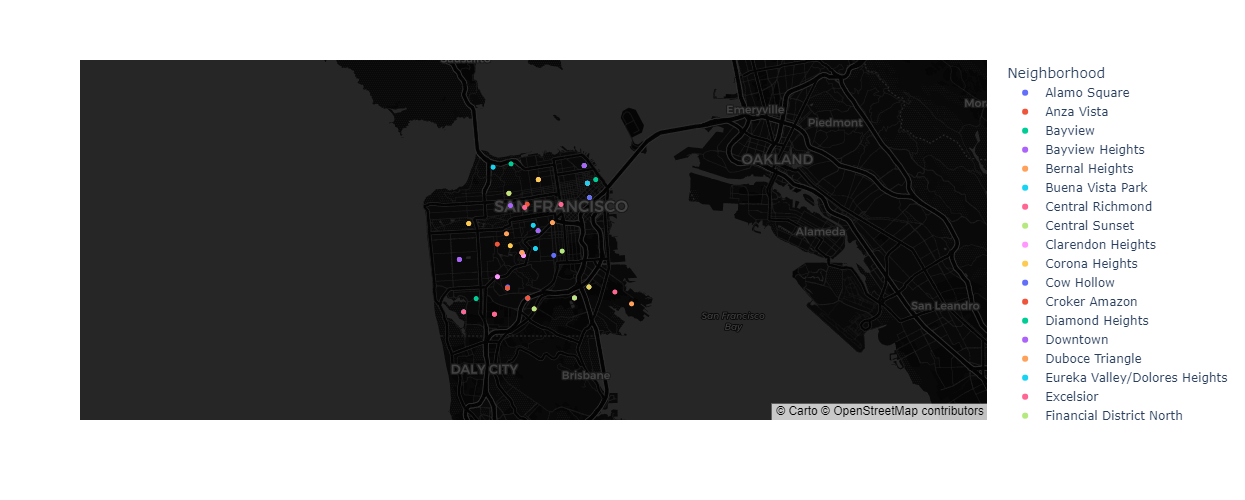

In [203]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
sfo_cordinates = pd.read_csv(file_path)
sfo_map_1 = px.scatter_mapbox(
sfo_cordinates,
lat='Lat',
lon='Lon',
color='Neighborhood',
hover_name='Neighborhood',
zoom=10,
mapbox_style='carto-darkmatter',
height=500
)

sfo_map_1.show()

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [204]:
# Calculate the mean values for each neighborhood
df_value_neighborhood = sfo_data.groupby(['neighborhood']).mean()


In [207]:
# Join the average values with the neighborhood locations
joined_average = df_value_neighborhood.join(sfo_cordinates, on='housing_units',rsuffix='rigt', lsuffix='left', how='outer')

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

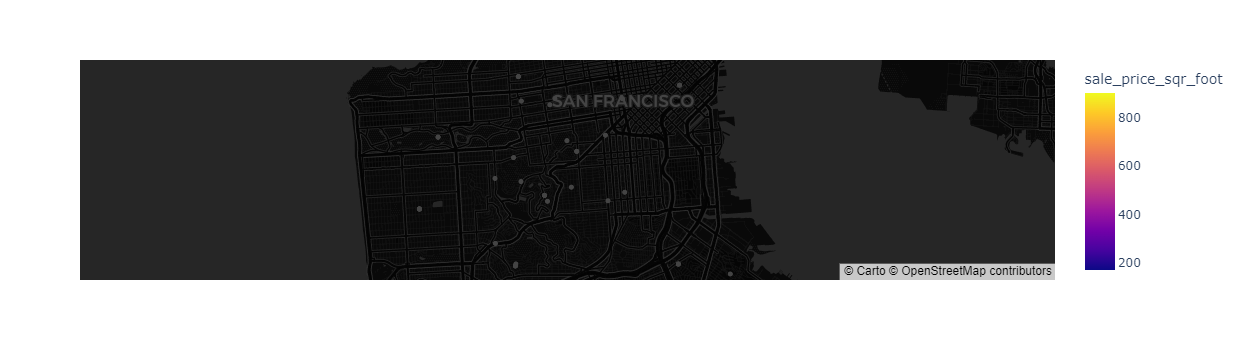

In [206]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info

sfo_map_2 = px.scatter_mapbox(
joined_average,
lat='Lat',
lon='Lon',
color='sale_price_sqr_foot',
hover_name='Neighborhood',
zoom=11,
mapbox_style='carto-darkmatter'

)
sfo_map_2

# In this exercise, I joined the two data frames, one contains Neiborhood(row wich is different from neighborrhood),so my sale_price_sqr_foot apear null do to the lack of data on those cordinates.


## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [279]:

# Fetch the data from all expensive neighborhoods per year.

df_cost = sfo_data.groupby(['sale_price_sqr_foot'])
df_year = sfo_data.groupby(['year'])
df_neigh = sfo_data.groupby(['neighborhood'])
df_cost.sort_values(by=['sale_price_sqr_foot'], ascending=False)
df_cost = df_cost.tail(11)

parallel_plot = pd.concat([df_cost, df_neigh, df_year])

#uncomplete


AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year
#uncomplete

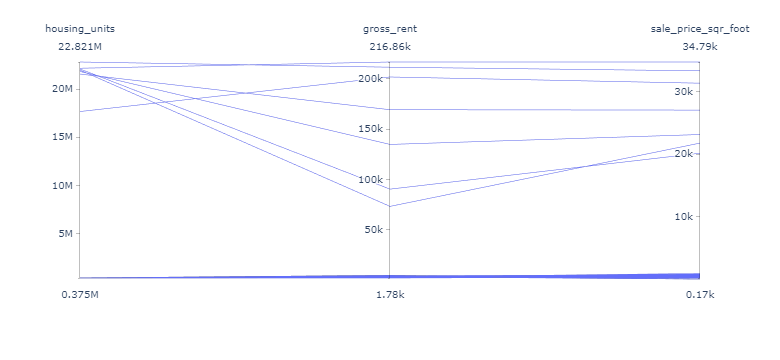

In [280]:
# Parallel Categories Plot
px.parallel_coordinates(parallel_plot)
#uncomplete

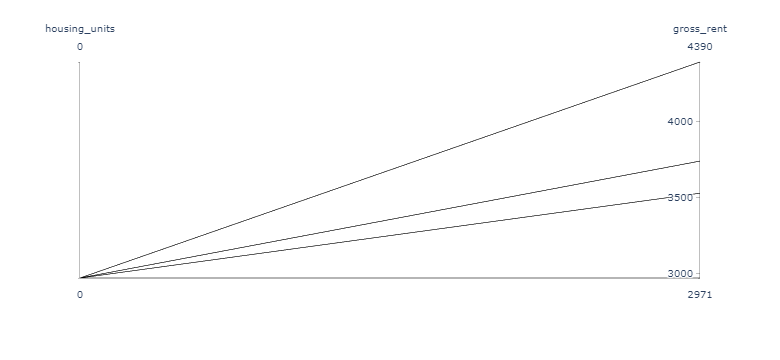

In [278]:
# Parallel Coordinates Plot
px.parallel_coordinates(the_10_most_expensive_neignorhood, color='housing_units')
#uncomplete:(

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

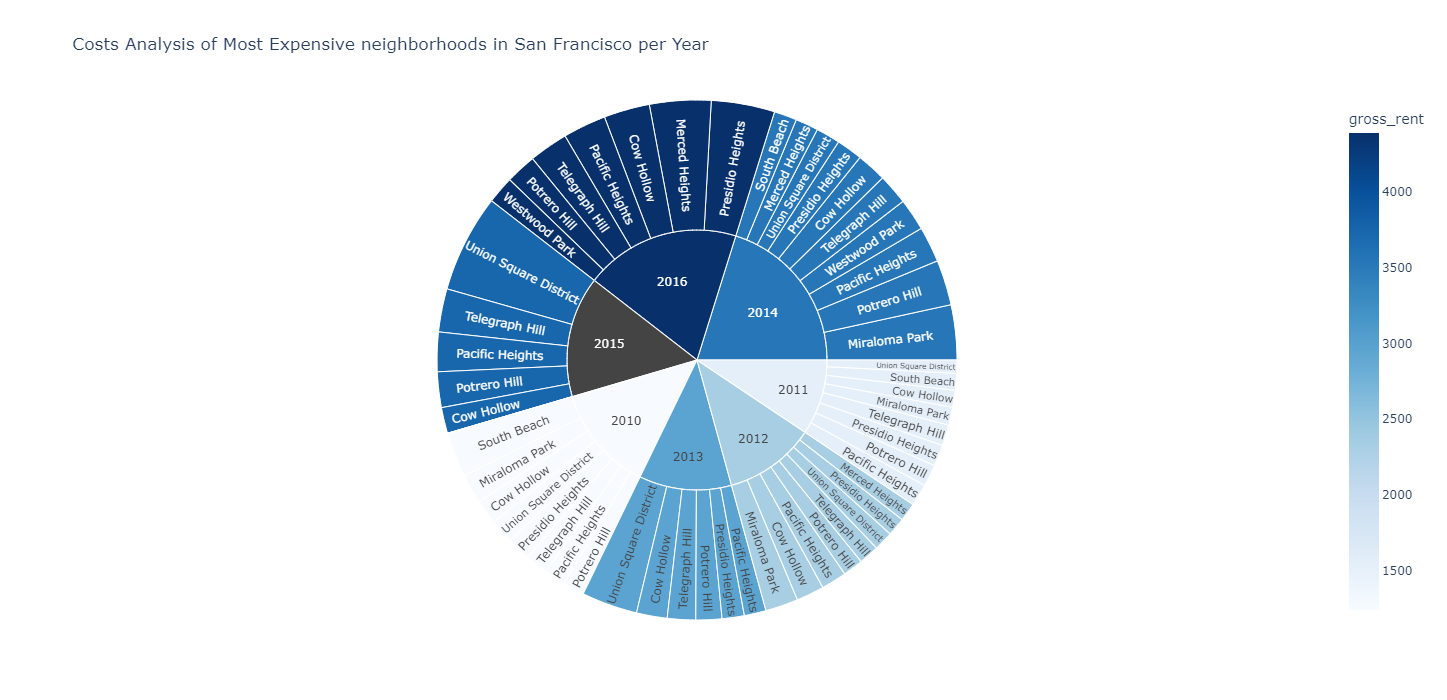

In [23]:
# Sunburst Plot
# YOUR CODE HERE!u
#uncomplete